### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import saved files
df_All = pd.read_csv('OrganicElectrodesPublications.csv')

In [3]:
df_All.head()

,Voltage,SMILES
0,2.95,O=C1C2=C(O)C=CC(O)=C2C(=O)C2=C1C(=O)C1=C(C2=O)...
1,2.40,O=C(C1=C(C(S(=O)(O[Na])=O)=CC=C1)C2=O)C3=C2C=C...
2,2.40,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C(S(=O)(O)=O)=C...
3,2.25,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2S(=O)(=O)O[Na]
4,2.25,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C=CC=C3)=C2O


In [4]:
df_All.shape

(971, 2)

In [5]:
df_All = df_All.drop_duplicates(subset='SMILES', keep='first')

In [6]:
df_All.shape

(934, 2)

Here are a few good color options that could work well for the plot:

- #4c8c4a (a balanced green)
- #5d85c1 (a soft blue)
- #a86e5c (a muted terracotta)
- #7b6ea8 (a subtle lavender)
- #6a9f58 (a gentle olive green)

#### Length distribution

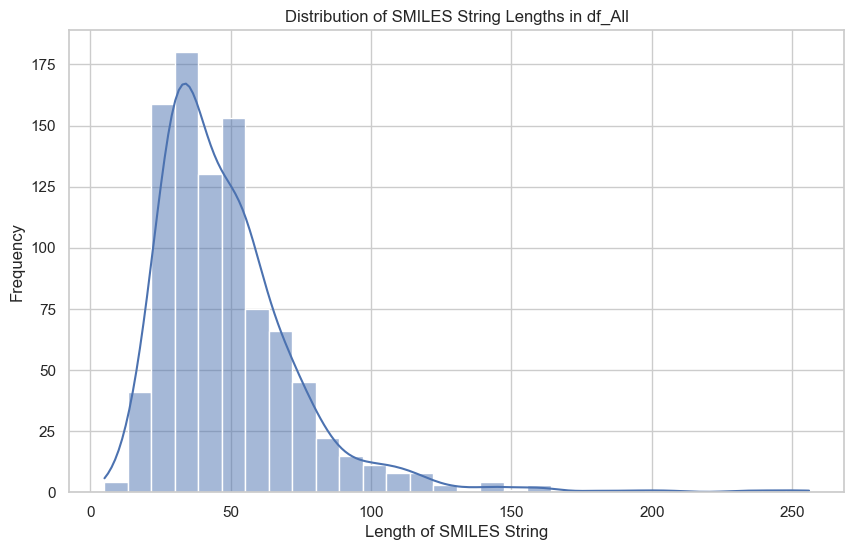

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each SMILES string
df_All['length'] = df_All['SMILES'].apply(len)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df_All['length'], bins=30, kde=True)

# Set the plot title and labels
plt.title('Distribution of SMILES String Lengths in df_All')
plt.xlabel('Length of SMILES String')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Figure for manuscript

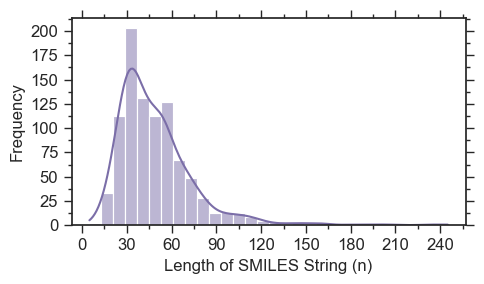

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Calculate the length of each SMILES string
df_All['length'] = df_All['SMILES'].apply(len)

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df_All['length'], bins=30, kde=True, color='#7b6ea8')  # Adjust color

# Set the labels with proper formatting
plt.xlabel('Length of SMILES String (n)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
max_length_All = df_All['SMILES'].apply(len).max()

print("The maximum length of SMILES strings in the df_All DataFrame is:", max_length_All)

The maximum length of SMILES strings in the df_All DataFrame is: 256


#### Voltage distribution

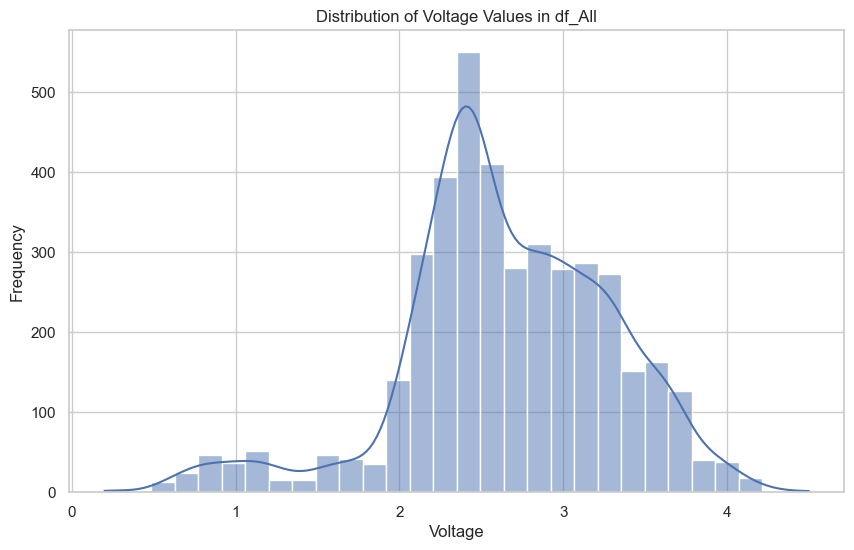

In [20]:
# Create the plot for Voltage distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_All['Voltage'], bins=30, kde=True)
plt.title('Distribution of Voltage Values in df_All')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.show()

Figure for manuscript

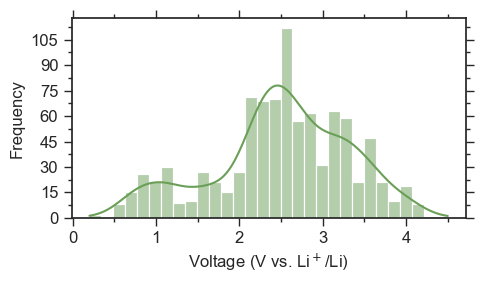

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Calculate the length of each SMILES string
df_All['length'] = df_All['SMILES'].apply(len)

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(df_All['Voltage'], bins=30, kde=True, color='#6a9f58')

# Set the labels with proper formatting
plt.xlabel(r'Voltage (V vs. Li$^+$/Li)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
# Filter the DataFrame for voltage values greater than 2.5
high_voltage_df_All = df_All[df_All['Voltage'] > 2.5]

# Count the number of rows with voltage values greater than 2.5
num_high_voltage_All = high_voltage_df_All.shape[0]

percent_All = round((num_high_voltage_All/df_All.shape[0]) * 100, 2)

print(f"Number of voltage values in df_All greater than 2.5: {num_high_voltage_All}")
print(f"Percentage: {percent_All}%")

Number of voltage values in df_All greater than 2.5: 462
Percentage: 49.46%


In [8]:
Voltage_threshold = 2.5

df_All['target'] = (df_All['Voltage'] > Voltage_threshold).astype(int)

In [9]:
df_All = df_All[df_All['length'] <= 250]

In [10]:
df_All.shape

(933, 4)

In [11]:
df_All.head()

,Voltage,SMILES,length,target
0,2.95,O=C1C2=C(O)C=CC(O)=C2C(=O)C2=C1C(=O)C1=C(C2=O)...,87,1
1,2.40,O=C(C1=C(C(S(=O)(O[Na])=O)=CC=C1)C2=O)C3=C2C=C...,64,0
2,2.40,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C(S(=O)(O)=O)=C...,55,0
3,2.25,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2S(=O)(=O)O[Na],48,0
4,2.25,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C=CC=C3)=C2O,43,0


In [12]:
# Reset the index of df_All after deleting columns
df_All = df_All.reset_index(drop=True)

#### Sanitization - SELFIES - Encoding

In [13]:
import pandas as pd
import selfies as sf
from rdkit import Chem
from rdkit.Chem import MolToSmiles
from rdkit import RDLogger
from sklearn.base import BaseEstimator, TransformerMixin

# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.error')

class SMILESToSELFIESTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, pad_to_len=None):
        self.pad_to_len = pad_to_len
        self.symbol_to_idx = None
        self.idx_to_symbol = None

    def sanitize_smiles(self, smiles):
        try:
            # Replace '.' with 'X'
            smiles = smiles.replace('.', 'X')
            mol = Chem.MolFromSmiles(smiles, sanitize=True)
            if mol is not None:
                return MolToSmiles(mol, canonical=True)
            else:
                return None
        except:
            return None

    def smiles_to_selfies(self, smiles):
        sanitized_smiles = self.sanitize_smiles(smiles)
        if sanitized_smiles:
            try:
                return sf.encoder(sanitized_smiles)
            except sf.EncoderError:
                return None
        return None

    def build_vocabulary(self, selfies_list):
        alphabet = sf.get_alphabet_from_selfies(selfies_list)
        alphabet.add("[nop]")  # [nop] is a special padding symbol
        self.alphabet = list(sorted(alphabet))
        self.symbol_to_idx = {s: i for i, s in enumerate(self.alphabet)}
        self.idx_to_symbol = {i: s for i, s in enumerate(self.alphabet)}

    def selfies_to_numerical(self, selfies):
        if not self.symbol_to_idx:
            raise ValueError("Vocabulary is not built. Call build_vocabulary first.")
        label, one_hot = sf.selfies_to_encoding(
            selfies=selfies,
            vocab_stoi=self.symbol_to_idx,
            pad_to_len=self.pad_to_len,
            enc_type="both"
        )
        return label

    def print_alphabet_list(self):
        if self.alphabet:
            print("Alphabet list:", self.alphabet)
        else:
            print("Alphabet list has not been built yet.")
    
    def fit(self, X, y=None):
        X = X.copy()
        # Convert SMILES to SELFIES
        X['selfies'] = X['smiles'].apply(self.smiles_to_selfies)
        
        # Filter out rows with invalid SELFIES
        X = X.dropna(subset=['selfies'])

        # Build vocabulary
        selfies_list = X['selfies'].tolist()
        self.build_vocabulary(selfies_list)

        # Determine pad_to_len if not specified
        if self.pad_to_len is None:
            self.pad_to_len = max(sf.len_selfies(s) for s in selfies_list)
        
        return self

    def transform(self, X, y=None):
        X = X.copy()
        # Convert SMILES to SELFIES (if not already done in fit)
        if 'selfies' not in X.columns:
            X['selfies'] = X['smiles'].apply(self.smiles_to_selfies)
        
        # Filter out rows with invalid SELFIES
        X = X.dropna(subset=['selfies'])

        # Convert SELFIES to numerical IDs
        X['numerical_ids'] = X['selfies'].apply(self.selfies_to_numerical)
        
        #return X[['numerical_ids']]

        # Convert the list of numerical IDs into a DataFrame
        numerical_ids_df = pd.DataFrame(X['numerical_ids'].tolist())
        
        return numerical_ids_df

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)


In [14]:
# Show full length
pd.set_option('display.max_colwidth', None)

#### IDs for df_All

In [15]:
df_trans_All = pd.DataFrame()
df_trans_All['smiles'] = df_All['SMILES']
trans_All = SMILESToSELFIESTransformer()
IDs_All = trans_All.fit_transform(df_trans_All)

In [16]:
df_trans_All = pd.DataFrame()
df_trans_All['smiles'] = df_All['SMILES']  # Copy the 'SMILES' column

# Transformer that converts SMILES to SELFIES IDs
trans_All = SMILESToSELFIESTransformer()

# Perform the transformation
IDs_All = trans_All.fit_transform(df_trans_All)

# Add the 'smiles' column to IDs_All
IDs_All['smiles'] = df_trans_All['smiles']


In [17]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,smiles
0,38,12,26,12,22,26,38,26,12,26,...,49,49,49,49,49,49,49,49,49,O=C1C2=C(O)C=CC(O)=C2C(=O)C2=C1C(=O)C1=C(C2=O)C(=O)C2=C(C1=O)C(=O)C1=C(C2=O)C(O)=CC=C1O
1,38,12,26,12,26,12,26,22,1,43,...,49,49,49,49,49,49,49,49,49,O=C(C1=C(C(S(=O)(O[Na])=O)=CC=C1)C2=O)C3=C2C=CC=C3S(=O)(O[Na])=O
2,38,19,10,26,15,22,26,38,26,12,...,49,49,49,49,49,49,49,49,49,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C(S(=O)(O)=O)=CC=C3)=C2O
3,38,12,26,12,26,12,26,12,40,10,...,49,49,49,49,49,49,49,49,49,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2S(=O)(=O)O[Na]
4,38,19,10,26,15,22,26,38,26,12,...,49,49,49,49,49,49,49,49,49,OC(C1=C2C=CC=C1S(=O)(O)=O)=C3C(C=CC=C3)=C2O


In [18]:
# Retrieve the calculated pad_to_len
print("Computed pad_to_len:", trans_All.pad_to_len)

Computed pad_to_len: 175


In [19]:
IDs_All.shape

(933, 176)

In [20]:
# Call print_alphabet_list() to print the alphabet list
trans_All.print_alphabet_list()

Alphabet list: ['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\\Ring1]', '[-\\Ring2]', '[/C]', '[/N]', '[/O]', '[/S]', '[=Branch1]', '[=Branch2]', '[=C]', '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]', '[B]', '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]', '[F]', '[I]', '[Li]', '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]', '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', '[S+1]', '[S]', '[\\C]', '[\\F]', '[\\N]', '[\\O]', '[\\S]', '[nop]']


In [21]:
trans_All.fit(df_trans_All)

SMILESToSELFIESTransformer(pad_to_len=175)

In [22]:
# Print the mapping from numerical IDs to SELFIES tokens
print("Numerical ID to Token mapping for df_All:")
for idx, token in trans_All.idx_to_symbol.items():
    print(f"ID {idx}: {token}")

Numerical ID to Token mapping for df_All:
ID 0: [#Branch1]
ID 1: [#Branch2]
ID 2: [#C]
ID 3: [#N]
ID 4: [-\Ring1]
ID 5: [-\Ring2]
ID 6: [/C]
ID 7: [/N]
ID 8: [/O]
ID 9: [/S]
ID 10: [=Branch1]
ID 11: [=Branch2]
ID 12: [=C]
ID 13: [=N+1]
ID 14: [=N]
ID 15: [=O]
ID 16: [=P]
ID 17: [=Ring1]
ID 18: [=Ring2]
ID 19: [=S]
ID 20: [B]
ID 21: [Br]
ID 22: [Branch1]
ID 23: [Branch2]
ID 24: [C@@H1]
ID 25: [C@H1]
ID 26: [C]
ID 27: [Cl]
ID 28: [F]
ID 29: [I]
ID 30: [Li]
ID 31: [N+1]
ID 32: [N-1]
ID 33: [NH1]
ID 34: [N]
ID 35: [Na]
ID 36: [O-1]
ID 37: [OH0]
ID 38: [O]
ID 39: [P]
ID 40: [Ring1]
ID 41: [Ring2]
ID 42: [S+1]
ID 43: [S]
ID 44: [\C]
ID 45: [\F]
ID 46: [\N]
ID 47: [\O]
ID 48: [\S]
ID 49: [nop]


In [23]:
import selfies as sf

# Define the SMILES string
smiles_string = "O=C(C=C1)C=CC1=O"

# Convert SMILES to SELFIES
selfies_string = sf.encoder(smiles_string)

print("SELFIES string:", selfies_string)


SELFIES string: [O][=C][Branch1][Ring1][C][=C][C][=C][C][Ring1][Ring2][=O]


#### Save and reuse embeddings

Using the same embedding, alphabet list, length, and padding from your trained SMILESToSELFIESTransformer class for screening molecules in a database

Save the Fitted Transformer Information: After fitting the transformer on your current dataset, save the vocabulary (symbol_to_idx, idx_to_symbol), alphabet, and pad_to_len. This ensures consistency when transforming the SMILES data from the new database.

In [24]:
import pickle

# After fitting the transformer
transformer = SMILESToSELFIESTransformer(pad_to_len=175)
transformer.fit(df_trans_All)

# Save the transformer state
with open('transformer_state.pkl', 'wb') as f:
    pickle.dump({
        'symbol_to_idx': transformer.symbol_to_idx,
        'idx_to_symbol': transformer.idx_to_symbol,
        'alphabet': transformer.alphabet,
        'pad_to_len': transformer.pad_to_len
    }, f)


Load the Fitted Transformer Information: When applying the transformer to the new dataset (e.g., the database of molecules), load the saved transformer state and use the same settings (vocabulary, padding length, etc.).

In [37]:
'''
# Load the transformer state
with open('transformer_state.pkl', 'rb') as f:
    state = pickle.load(f)

# Initialize transformer with saved state
transformer = SMILESToSELFIESTransformer(pad_to_len=state['pad_to_len'])
transformer.symbol_to_idx = state['symbol_to_idx']
transformer.idx_to_symbol = state['idx_to_symbol']
transformer.alphabet = state['alphabet']

# Transform the new database (df_new)
df_new_numerical_ids = transformer.transform(df_new)

'''

"\n# Load the transformer state\nwith open('transformer_state.pkl', 'rb') as f:\n    state = pickle.load(f)\n\n# Initialize transformer with saved state\ntransformer = SMILESToSELFIESTransformer(pad_to_len=state['pad_to_len'])\ntransformer.symbol_to_idx = state['symbol_to_idx']\ntransformer.idx_to_symbol = state['idx_to_symbol']\ntransformer.alphabet = state['alphabet']\n\n# Transform the new database (df_new)\ndf_new_numerical_ids = transformer.transform(df_new)\n\n"

In [25]:
IDs_All.shape

(933, 176)

Given that the IDs_All dataframe has 175 columns (with column names ranging from 0 to 174), and it contains padded SMILES numerical IDs, we can modify the code to work directly with this dataframe. The goal is to create binary features based on whether any of the numerical IDs (from 0 to 48) appear in each row of IDs_All.

In [26]:
# Alphabet list size (0 to 48)
alphabet_size = 49

# Initialize a new DataFrame to store the binary features (columns: 0 to 48)
binary_features_df = pd.DataFrame(0, index=IDs_All.index, columns=range(alphabet_size))

# Function to create a binary vector for each row in IDs_All
def create_binary_vector(row, alphabet_size):
    binary_vector = [0] * alphabet_size
    for num_id in row:
        if isinstance(num_id, int) and 0 <= num_id < alphabet_size:  # Ensure only numeric IDs are considered
            binary_vector[num_id] = 1
    return binary_vector

# Apply the function to each row of IDs_All, excluding the 'smiles' column
for idx, row in IDs_All.drop(columns=['smiles']).iterrows():
    binary_features_df.loc[idx] = create_binary_vector(row, alphabet_size)



In [27]:
binary_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [28]:
binary_features_df.shape

(933, 49)

In [29]:
# Alphabet list from 0 to 48, corresponding to the numerical IDs
alphabet_list = ['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\\Ring1]', '[-\\Ring2]', '[/C]', '[/N]', '[/O]', '[/S]', 
                 '[=Branch1]', '[=Branch2]', '[=C]', '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]',
                 '[B]', '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]', '[F]', '[I]', '[Li]', 
                 '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]', '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', 
                 '[S+1]', '[S]', '[\\C]', '[\\F]', '[\\N]', '[\\O]', '[\\S]']

# Assign the alphabet_list as the column names for binary_features_df
binary_features_df.columns = alphabet_list


In [30]:
binary_features_df.head()

,[#Branch1],[#Branch2],[#C],[#N],[-\Ring1],[-\Ring2],[/C],[/N],[/O],[/S],...,[P],[Ring1],[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S]
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
binary_features_Len_V_df = binary_features_df.copy()

In [32]:
binary_features_Len_V_df[["Voltage","length"]] = df_All[["Voltage","length"]]

In [33]:
binary_features_Len_V_df.head()

,[#Branch1],[#Branch2],[#C],[#N],[-\Ring1],[-\Ring2],[/C],[/N],[/O],[/S],...,[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S],Voltage,length
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2.95,87
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2.40,64
2,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2.40,55
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.25,48
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.25,43


#### Correlation matrix of SELFIES features

In [34]:
# Display the correlation matrix of features in binary_features_Len_V_df
correlation_matrix = binary_features_Len_V_df.corr()

# Print the correlation matrix
print(correlation_matrix)

            [#Branch1]  [#Branch2]      [#C]      [#N]  [-\Ring1]  [-\Ring2]  \
[#Branch1]    1.000000    0.113336 -0.016492 -0.031370  -0.026205  -0.018520   
[#Branch2]    0.113336    1.000000 -0.003086 -0.008909  -0.031361  -0.022163   
[#C]         -0.016492   -0.003086  1.000000  0.237196  -0.022661  -0.016015   
[#N]         -0.031370   -0.008909  0.237196  1.000000  -0.010311  -0.007287   
[-\Ring1]    -0.026205   -0.031361 -0.022661 -0.010311   1.000000  -0.001518   
[-\Ring2]    -0.018520   -0.022163 -0.016015 -0.007287  -0.001518   1.000000   
[/C]          0.008071   -0.012280 -0.023403  0.012074  -0.015237   0.099639   
[/N]          0.007037   -0.008023  0.011580  0.018112   0.201237   0.142220   
[/O]         -0.052580   -0.062924 -0.016009 -0.020689   0.498386   0.352223   
[/S]         -0.034555    0.064130  0.028244 -0.023157  -0.004824  -0.003410   
[=Branch1]   -0.012891    0.092067 -0.006047 -0.146114   0.019556   0.013821   
[=Branch2]   -0.038168    0.006666 -0.01

In [35]:
binary_features_Len_V_df.head()

,[#Branch1],[#Branch2],[#C],[#N],[-\Ring1],[-\Ring2],[/C],[/N],[/O],[/S],...,[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S],Voltage,length
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2.95,87
1,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2.40,64
2,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,2.40,55
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.25,48
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.25,43


In [36]:
print(binary_features_Len_V_df['Voltage'].dtype)

float64


In [37]:
# Check for NaN values in the 'Voltage' column
if binary_features_Len_V_df['Voltage'].isna().any():
    print("There are NaN values in the 'Voltage' column.")
else:
    print("No NaN values in the 'Voltage' column.")


No NaN values in the 'Voltage' column.


In [38]:
print(binary_features_Len_V_df.columns)  # Confirm 'Voltage' is listed among the columns


Index(['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\Ring1]', '[-\Ring2]',
       '[/C]', '[/N]', '[/O]', '[/S]', '[=Branch1]', '[=Branch2]', '[=C]',
       '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]', '[B]',
       '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]',
       '[F]', '[I]', '[Li]', '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]',
       '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', '[S+1]', '[S]', '[\C]',
       '[\F]', '[\N]', '[\O]', '[\S]', 'Voltage', 'length'],
      dtype='object')


In [40]:
print(correlation_matrix.columns)


Index(['[#Branch1]', '[#Branch2]', '[#C]', '[#N]', '[-\Ring1]', '[-\Ring2]',
       '[/C]', '[/N]', '[/O]', '[/S]', '[=Branch1]', '[=Branch2]', '[=C]',
       '[=N+1]', '[=N]', '[=O]', '[=P]', '[=Ring1]', '[=Ring2]', '[=S]', '[B]',
       '[Br]', '[Branch1]', '[Branch2]', '[C@@H1]', '[C@H1]', '[C]', '[Cl]',
       '[F]', '[I]', '[Li]', '[N+1]', '[N-1]', '[NH1]', '[N]', '[Na]', '[O-1]',
       '[OH0]', '[O]', '[P]', '[Ring1]', '[Ring2]', '[S+1]', '[S]', '[\C]',
       '[\F]', '[\N]', '[\O]', '[\S]', 'Voltage', 'length'],
      dtype='object')


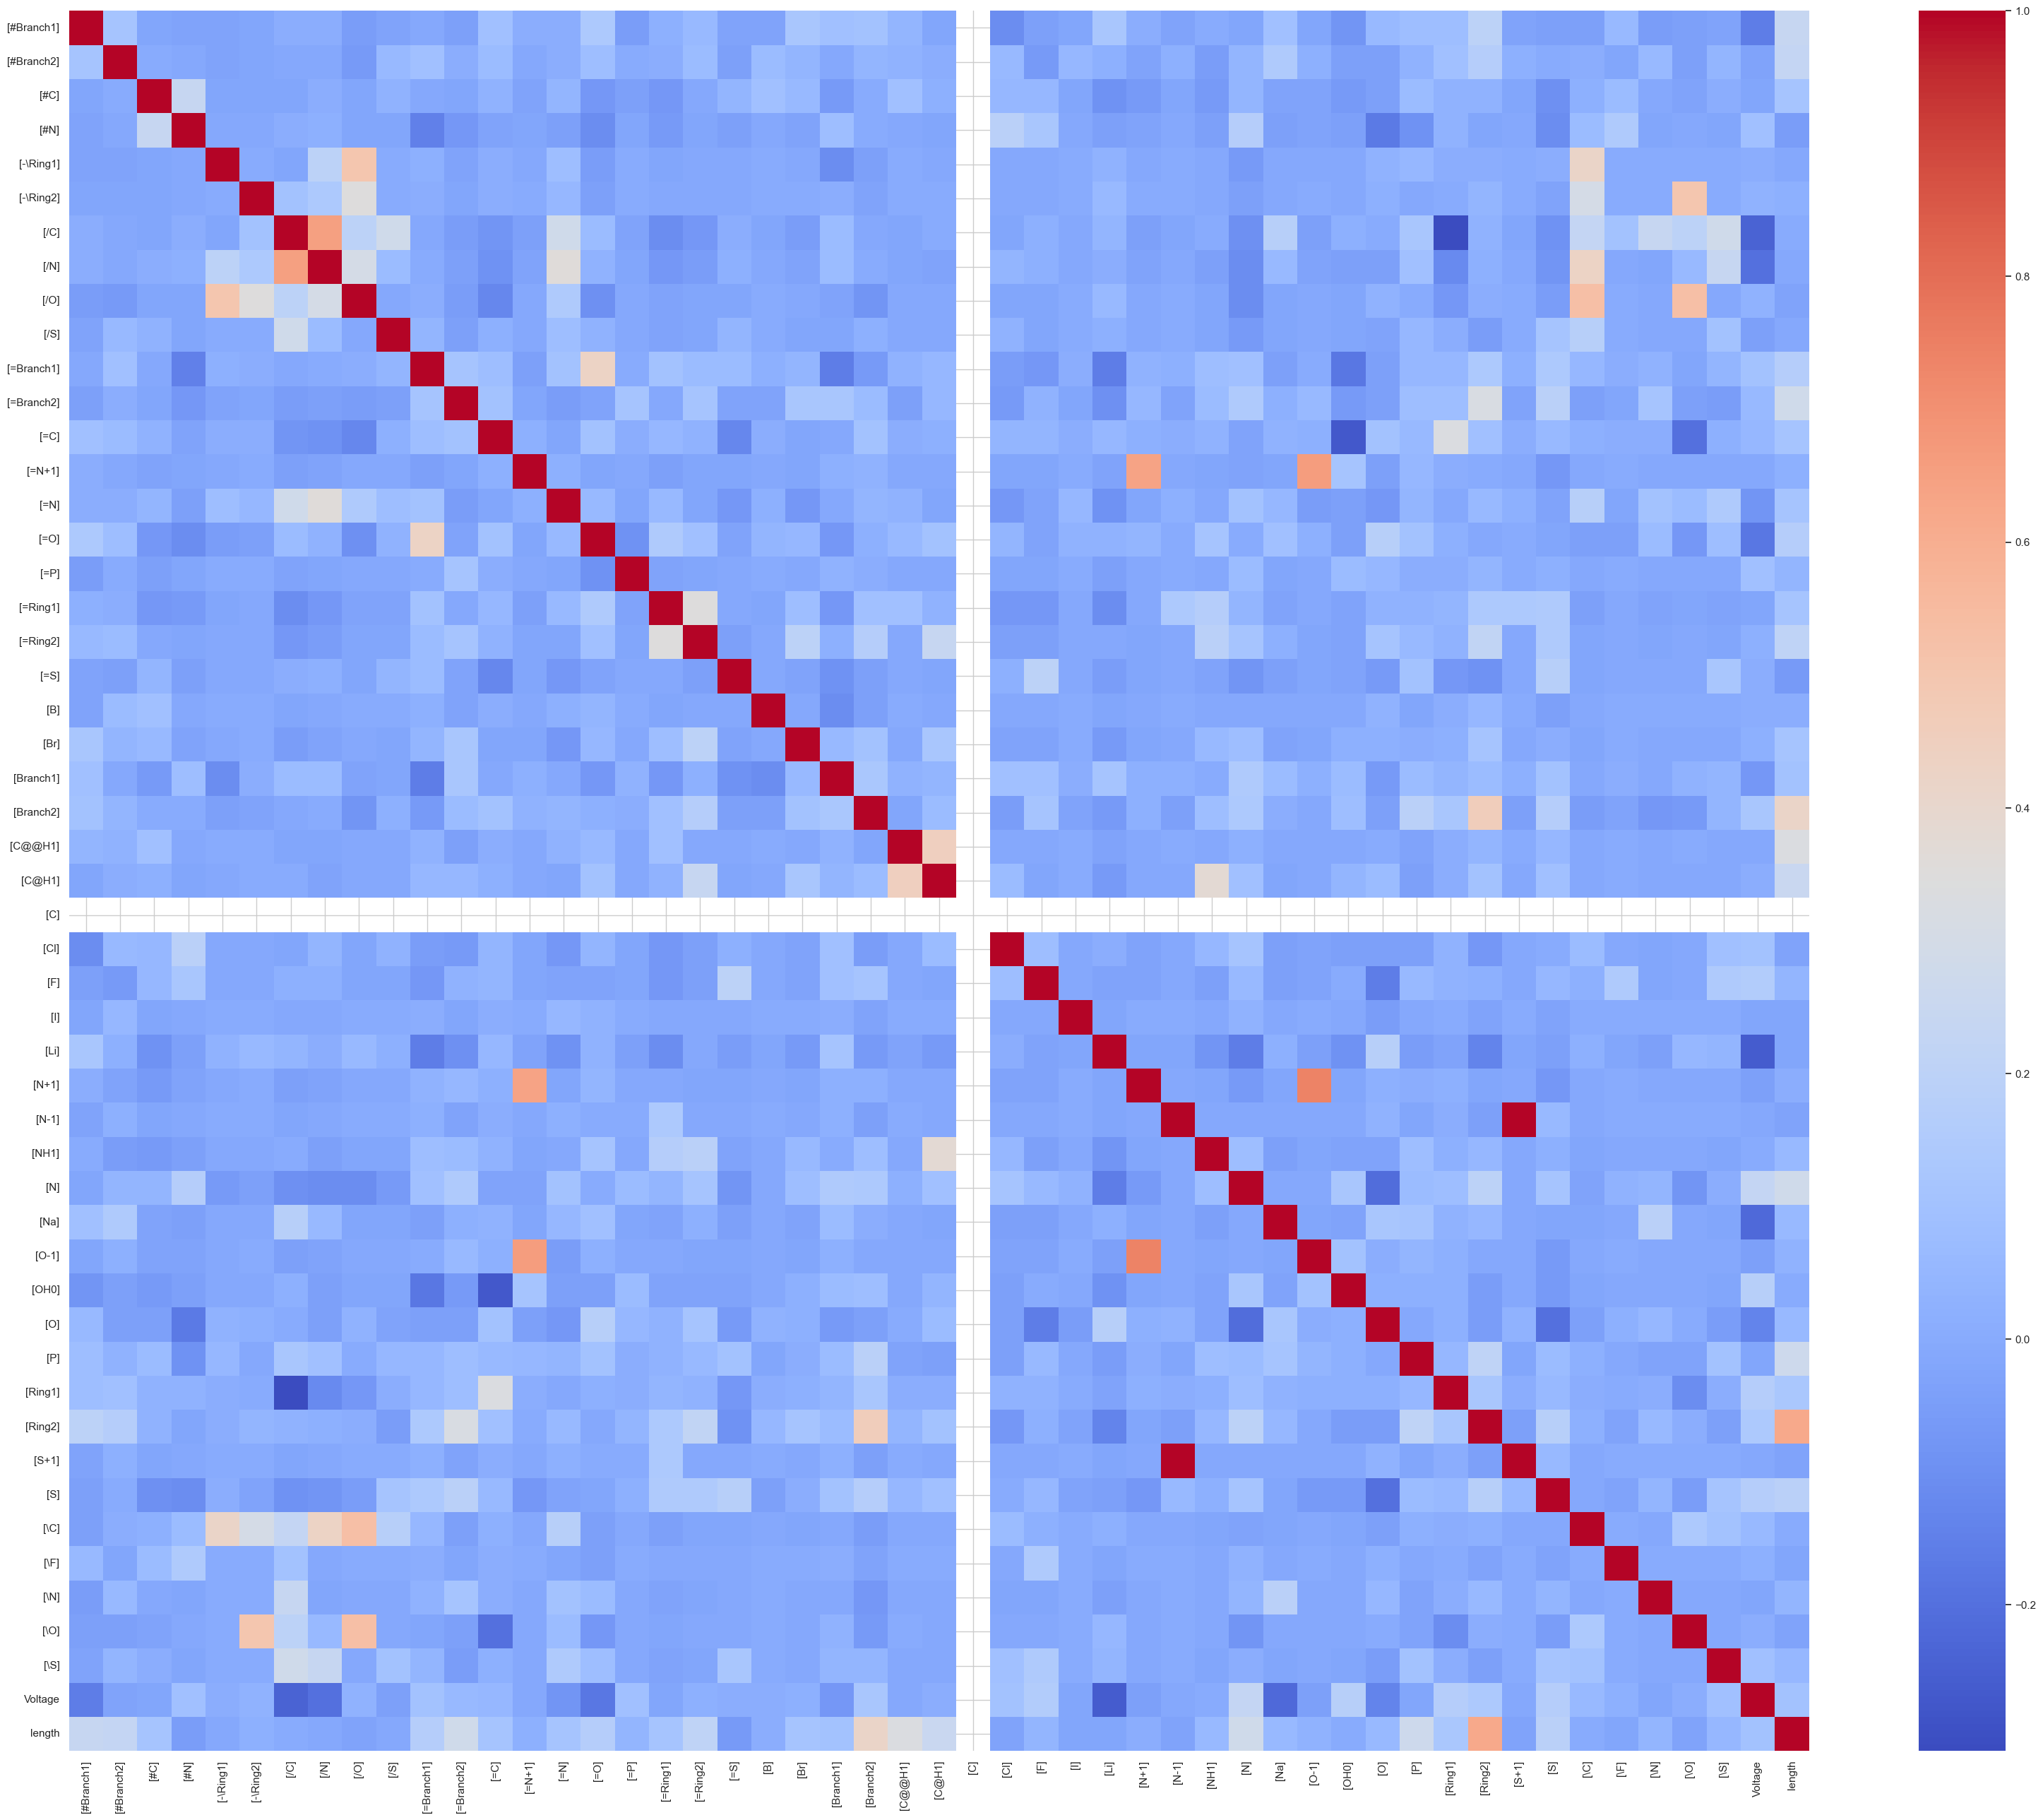

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = binary_features_Len_V_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(40, 32))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix.round(2), annot=False, cmap='coolwarm', square=True)

# Show the plot
plt.show()


In [38]:
IDs_All = pd.concat([IDs_All, binary_features_df], axis=1)

# Convert all column names to strings
IDs_All.columns = IDs_All.columns.astype(str)

# Now, the column names are all strings and compatible with ML libraries


In [39]:
IDs_All.shape

(933, 225)

In [40]:
# Assign 'target' column from df_All to IDs_All
IDs_All[['target']] = df_All[['target']]


In [41]:
IDs_All.head()

,0,1,2,3,4,5,6,7,8,9,...,[Ring1],[Ring2],[S+1],[S],[\C],[\F],[\N],[\O],[\S],target
0,38,12,26,12,22,26,38,26,12,26,...,1,1,0,0,0,0,0,0,0,1
1,38,12,26,12,26,12,26,22,1,43,...,1,1,0,1,0,0,0,0,0,0
2,38,19,10,26,15,22,26,38,26,12,...,1,1,0,1,0,0,0,0,0,0
3,38,12,26,12,26,12,26,12,40,10,...,1,0,0,1,0,0,0,0,0,0
4,38,19,10,26,15,22,26,38,26,12,...,1,0,0,1,0,0,0,0,0,0


#### Molecular Features

In [42]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdchem

# Define the smiles_to_features function
def smiles_to_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    # Count the total number of atoms and bonds in the molecule
    num_atoms = mol.GetNumAtoms()
    num_bonds = mol.GetNumBonds()

    # Check if the molecule contains aromatic rings
    is_molecule_aromatic = any(atom.GetIsAromatic() for atom in mol.GetAtoms() if atom.IsInRing())

    # Check for conjugation
    is_conjugated = False
    for bond in mol.GetBonds():
        if bond.GetBondType() in (rdchem.BondType.DOUBLE, rdchem.BondType.AROMATIC):
            is_conjugated = True
            break

    # Atom features
    atom_features = {
        'avg_hybridization': sum([atom.GetHybridization() for atom in mol.GetAtoms()]) / num_atoms,
        'avg_num_hydrogens': sum([atom.GetTotalNumHs() for atom in mol.GetAtoms()]) / num_atoms
    }
    
    # Additional molecular properties
    molecular_weight = Descriptors.MolWt(mol)  # Molecular weight
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)  # Number of rotatable bonds
    num_rings = Descriptors.RingCount(mol)  # Number of rings

    # Count conjugated double bonds (for estimation purposes)
    degree_of_conjugation = sum(1 for bond in mol.GetBonds() if bond.GetBondType() in (rdchem.BondType.DOUBLE, rdchem.BondType.AROMATIC))

    return {
        # Atom features
        **atom_features,
        # Molecular features
        'num_atoms': num_atoms,
        'num_bonds': num_bonds,
        'is_molecule_aromatic': is_molecule_aromatic,
        'is_conjugated': is_conjugated,
        'molecular_weight': molecular_weight,
        'num_rotatable_bonds': num_rotatable_bonds,
        'num_rings': num_rings,
        'degree_of_conjugation': degree_of_conjugation,
    }


In [43]:
has_nan = IDs_All.isna().any().any()

print(f"Does IDs_All contain any NaN values? {has_nan}")

Does IDs_All contain any NaN values? False


In [44]:
# Apply the function to the DataFrame
IDs_All['features'] = IDs_All['smiles'].apply(smiles_to_features)

# Convert the 'features' dictionary into separate columns
mol_features_df = pd.json_normalize(IDs_All['features'])


In [45]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,is_conjugated,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.000000,0.210526,38,43,True,True,512.338,0,6,39
1,3.000000,0.230769,26,28,True,True,412.308,4,3,18
2,3.166667,0.416667,24,26,True,True,370.360,2,3,20
3,3.000000,0.333333,21,23,True,True,310.262,2,3,16
4,3.100000,0.500000,20,22,True,True,290.296,1,3,18


In [46]:
# Get min and max of 'avg_hybridization'
min_hybrid = mol_features_df['avg_hybridization'].min()  # Minimum value in the column
max_hybrid = mol_features_df['avg_hybridization'].max()  # Maximum value in the column

print(f"Minimum avg_hybridization: {min_hybrid}")
print(f"Maximum avg_hybridization: {max_hybrid}")

Minimum avg_hybridization: 2.3333333333333335
Maximum avg_hybridization: 4.0


In [47]:
from rdkit import Chem
from rdkit.Chem.rdchem import HybridizationType

# Create a simple molecule (e.g., ethyne: C≡C for SP, ethene: C=C for SP2, ethane: C-C for SP3)
mol_sp = Chem.MolFromSmiles('C#C')    # SP (linear)
mol_sp2 = Chem.MolFromSmiles('C=C')   # SP2 (trigonal planar)
mol_sp3 = Chem.MolFromSmiles('CC')    # SP3 (tetrahedral)

# Get hybridization values for the first atom in each molecule
hybrid_sp = mol_sp.GetAtomWithIdx(0).GetHybridization()
hybrid_sp2 = mol_sp2.GetAtomWithIdx(0).GetHybridization()
hybrid_sp3 = mol_sp3.GetAtomWithIdx(0).GetHybridization()

# Print numeric values and their symbolic names
print(f"SP:  {hybrid_sp} (numeric: {int(hybrid_sp)})")
print(f"SP2: {hybrid_sp2} (numeric: {int(hybrid_sp2)})")
print(f"SP3: {hybrid_sp3} (numeric: {int(hybrid_sp3)})")

SP:  SP (numeric: 2)
SP2: SP2 (numeric: 3)
SP3: SP3 (numeric: 4)


Summary Statistics:
count    933.000000
mean       3.057332
std        0.251412
min        2.333333
25%        3.000000
50%        3.000000
75%        3.166667
max        4.000000
Name: avg_hybridization, dtype: float64


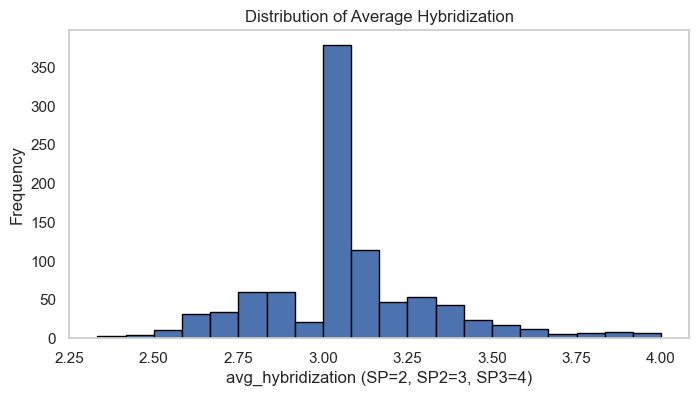

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Check min/max and distribution
print("Summary Statistics:")
print(mol_features_df['avg_hybridization'].describe())

# Plot histogram
plt.figure(figsize=(8, 4))
mol_features_df['avg_hybridization'].hist(bins=20, edgecolor='black')
plt.xlabel('avg_hybridization (SP=2, SP2=3, SP3=4)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Hybridization')
plt.grid(False)
plt.show()

Analysis and Summary
(Based on Hybridization Data of 933 Organic Cathode Materials)

1. Key Statistics
Mean: 3.057
Suggests a dominant mix of SP2 (e.g., aromatic rings) and SP3 (e.g., aliphatic chains).

Std: 0.251
Low deviation indicates structural consistency across the dataset.

Min: 2.333
Materials near this value likely have extended conjugated systems (e.g., polycyclic aromatics).

Max: 4.000
Pure SP3 hybridization suggests fully saturated frameworks (e.g., cross-linked polymers).

2. Distribution Insights
Median: 3.000
Half of the materials are SP2-dominant, typical for organic electrodes with conjugation.

75th percentile: 3.167
Higher values imply SP3-rich motifs (e.g., branched or sterically hindered groups).

25th percentile: 3.000
Materials here may include minor SP contributions (e.g., alkyne linkages).

3. Implications for Material Design
High SP2 content enhances electron delocalization for better conductivity.

SP3 moieties may improve mechanical stability or electrolyte compatibility.

Materials with ~2.33 may trade conductivity for lower structural rigidity.

Pure SP3 systems (4.0) might require conductive fillers to offset poor charge transport.

Conclusion
The dataset is dominated by conjugated SP2 frameworks, with SP3 modifications for stability. Outliers (e.g., pure SP3) warrant case-by-case evaluation for electrochemical performance.

In [49]:
# Convert boolean columns to numerical values (1 for True, 0 for False)
mol_features_df['is_molecule_aromatic'] = mol_features_df['is_molecule_aromatic'].astype(int)
mol_features_df['is_conjugated'] = mol_features_df['is_conjugated'].astype(int)

In [50]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,is_conjugated,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.000000,0.210526,38,43,1,1,512.338,0,6,39
1,3.000000,0.230769,26,28,1,1,412.308,4,3,18
2,3.166667,0.416667,24,26,1,1,370.360,2,3,20
3,3.000000,0.333333,21,23,1,1,310.262,2,3,16
4,3.100000,0.500000,20,22,1,1,290.296,1,3,18


In [57]:
# Count how many molecules are not aromatic (is_molecule_aromatic == 0)
not_aromatic_count = (mol_features_df['is_molecule_aromatic'] == 0).sum()

# Print the count
print(f"Number of molecules that are not aromatic: {not_aromatic_count}")


Number of molecules that are not aromatic: 164


In [58]:
# Count how many molecules are not conjugated (is_conjugated == 0)
not_conjugated_count = (mol_features_df['is_conjugated'] == 0).sum()

# Print the count
print(f"Number of molecules that are not conjugated: {not_conjugated_count}")


Number of molecules that are not conjugated: 8


In [51]:
# Delete the 'is_conjugated' column from features_df
mol_features_df = mol_features_df.drop(columns=['is_conjugated'])


In [52]:
mol_features_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation
0,3.000000,0.210526,38,43,1,512.338,0,6,39
1,3.000000,0.230769,26,28,1,412.308,4,3,18
2,3.166667,0.416667,24,26,1,370.360,2,3,20
3,3.000000,0.333333,21,23,1,310.262,2,3,16
4,3.100000,0.500000,20,22,1,290.296,1,3,18


In [53]:

# Drop the 'features' column if it's no longer needed
IDs_All.drop(columns=['features'], inplace=True)

In [54]:
mol_features_Len_V_df = mol_features_df.copy()

In [55]:
mol_features_Len_V_df[["Voltage","length"]] = df_All[["Voltage","length"]]

In [56]:
mol_features_Len_V_df.head()

,avg_hybridization,avg_num_hydrogens,num_atoms,num_bonds,is_molecule_aromatic,molecular_weight,num_rotatable_bonds,num_rings,degree_of_conjugation,Voltage,length
0,3.000000,0.210526,38,43,1,512.338,0,6,39,2.95,87
1,3.000000,0.230769,26,28,1,412.308,4,3,18,2.40,64
2,3.166667,0.416667,24,26,1,370.360,2,3,20,2.40,55
3,3.000000,0.333333,21,23,1,310.262,2,3,16,2.25,48
4,3.100000,0.500000,20,22,1,290.296,1,3,18,2.25,43


#### Correlation matrix of molecular features

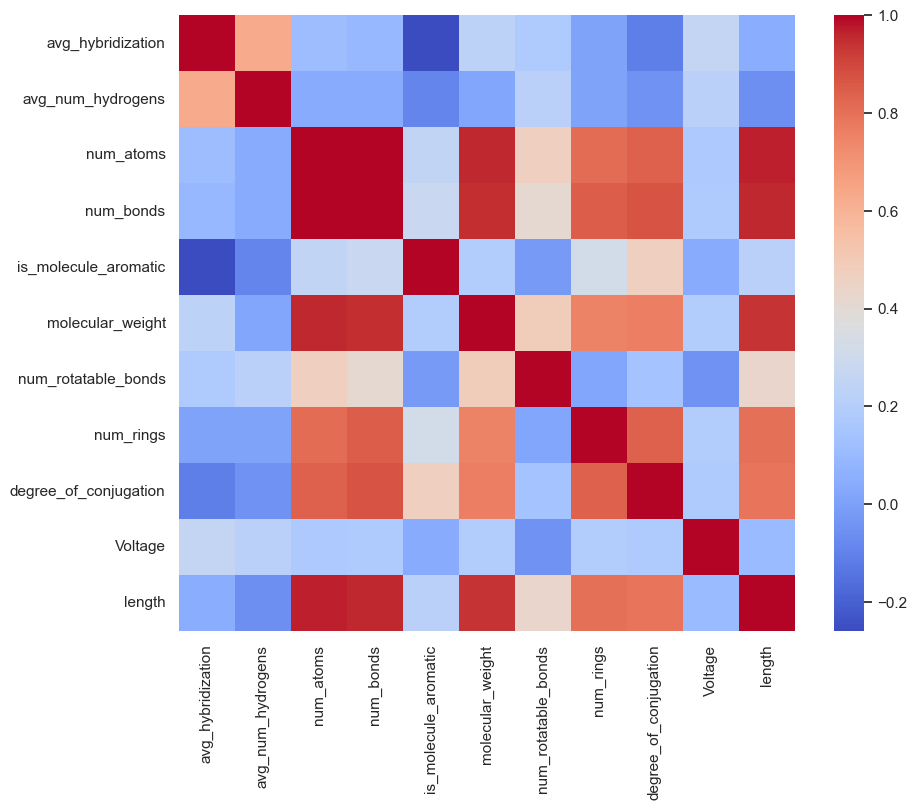

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = mol_features_Len_V_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix.round(2), annot=False, cmap='coolwarm', square=True)

# Show the plot
plt.show()

#### The top 10 features and the target variable 'voltage'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the top 10 features and the target variable 'voltage'
top_features = ['avg_num_hydrogens', 'degree_of_conjugation', 'avg_hybridization', '0', '25', 
                '[Li]', 'num_rings', 'num_bonds', '[#Branch1]', '[/S]', 'voltage']

# Filtering the dataframe for the selected features
data_for_correlation = mol_features_all[top_features]

# Calculating the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation between Top 10 Features and Voltage")
plt.show()


#### Figures for manuscript

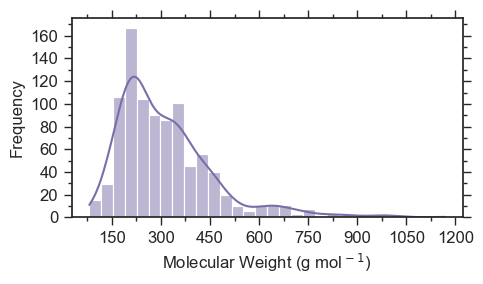

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(mol_features_df['molecular_weight'], bins=30, kde=True, color='#7b6ea8')

# Set the labels with proper formatting
plt.xlabel(r'Molecular Weight (g mol$^-$$^1$)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


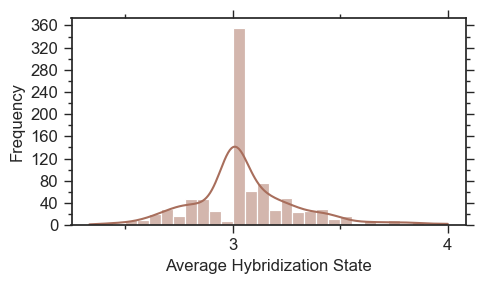

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(mol_features_df['avg_hybridization'], bins=30, kde=True, color='#a86e5c')

# Set the labels with proper formatting
plt.xlabel('Average Hybridization State', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


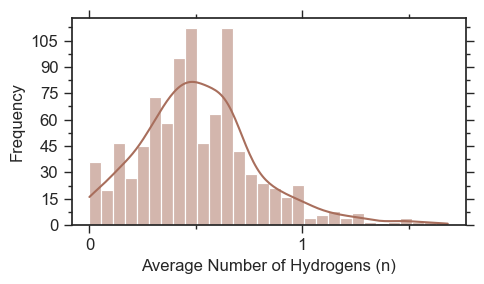

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(mol_features_df['avg_num_hydrogens'], bins=30, kde=True, color='#a86e5c')

# Set the labels with proper formatting
plt.xlabel('Average Number of Hydrogens (n)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()


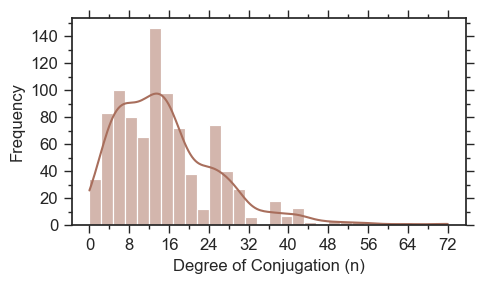

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the plot style without grid
sns.set(style="white")

# Create the plot
plt.figure(figsize=(5, 3))
sns.histplot(mol_features_df['degree_of_conjugation'], bins=30, kde=True, color='#a86e5c')

# Set the labels with proper formatting
plt.xlabel('Degree of Conjugation (n)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add top and right axes (spines)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Set major and minor ticks explicitly
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # One minor tick between major ticks
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# Ensure tick visibility, place them outside, and adjust their appearance
plt.tick_params(axis='x', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='y', which='both', direction='out', length=6, width=1, labelsize=12)  # Match label fontsize
plt.tick_params(axis='x', which='minor', length=3)  # Shorter minor ticks
plt.tick_params(axis='y', which='minor', length=3)

# Make sure to force the tick marks to display
plt.gca().xaxis.set_tick_params(which='both', bottom=True, top=True)
plt.gca().yaxis.set_tick_params(which='both', left=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()
